In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cmocean.cm as cmo
from scipy.interpolate import griddata
from datetime import datetime, timedelta
import gsw
import datetime
import cartopy.crs as ccrs
from pathlib import Path
import cmasher as cmr
import matplotlib.colors as mcolors

xr.set_options(keep_attrs=True)
plt.rcParams['font.size']=14

In [3]:
ds01=xr.open_mfdataset('../../Maud12_sensitivityruns/EXP_REF_intel/polynyacount_EXP_REF_intel.nc')
ds03=xr.open_mfdataset('../../Maud12_sensitivityruns/EXP_mfc_ori/polynyacount_EXP_mfc_ori.nc')
ds04=xr.open_mfdataset('../../Maud12_sensitivityruns/EXP_mfc_mod/polynyacount_EXP_mfc_mod.nc')
ds36=xr.open_mfdataset('../../Maud12_sensitivityruns/EXP_tpre00_prsn00_2012/polynyacount_EXP_tpre00_prsn00_2012.nc')
ds38=xr.open_mfdataset('../../Maud12_sensitivityruns/EXP_tpre01_prsn01_2012/polynyacount_EXP_tpre01_prsn01_2012.nc')
ds39=xr.open_mfdataset('../../Maud12_sensitivityruns/EXP_tpre02_prsn02_2012/polynyacount_EXP_tpre02_prsn02_2012.nc')
ds40=xr.open_mfdataset('../../Maud12_sensitivityruns/EXP_tpre03_prsn03_2012/polynyacount_EXP_tpre03_prsn03_2012.nc')
ds43=xr.open_mfdataset('../../Maud12_sensitivityruns/EXP_tpre04_prsn04_2012/polynyacount_EXP_tpre04_prsn04_2012.nc')

bat=xr.open_dataset('../../MAUD_RISE_config/maud_v4/m12_mask/1_domain_cfg_50levels_new.nc')
bat.coords['lon']=bat.nav_lon
bat.coords['lat']=bat.nav_lat
ds01

<xarray.Dataset>
Dimensions:  (x: 295, y: 270, year: 11)
Coordinates:
  * x        (x) int64 0 1 2 3 4 5 6 7 8 ... 286 287 288 289 290 291 292 293 294
  * y        (y) int64 0 1 2 3 4 5 6 7 8 ... 261 262 263 264 265 266 267 268 269
  * year     (year) int64 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
    lat      (y, x) float32 dask.array<chunksize=(270, 295), meta=np.ndarray>
    lon      (y, x) float32 dask.array<chunksize=(270, 295), meta=np.ndarray>
Data variables:
    siv_03   (y, x, year) float64 dask.array<chunksize=(270, 295, 11), meta=np.ndarray>
    siv_01   (y, x, year) float64 dask.array<chunksize=(270, 295, 11), meta=np.ndarray>
    sic_06   (y, x, year) float64 dask.array<chunksize=(270, 295, 11), meta=np.ndarray>
    sic_04   (y, x, year) float64 dask.array<chunksize=(270, 295, 11), meta=np.ndarray>
    sic_02   (y, x, year) float64 dask.array<chunksize=(270, 295, 11), meta=np.ndarray>

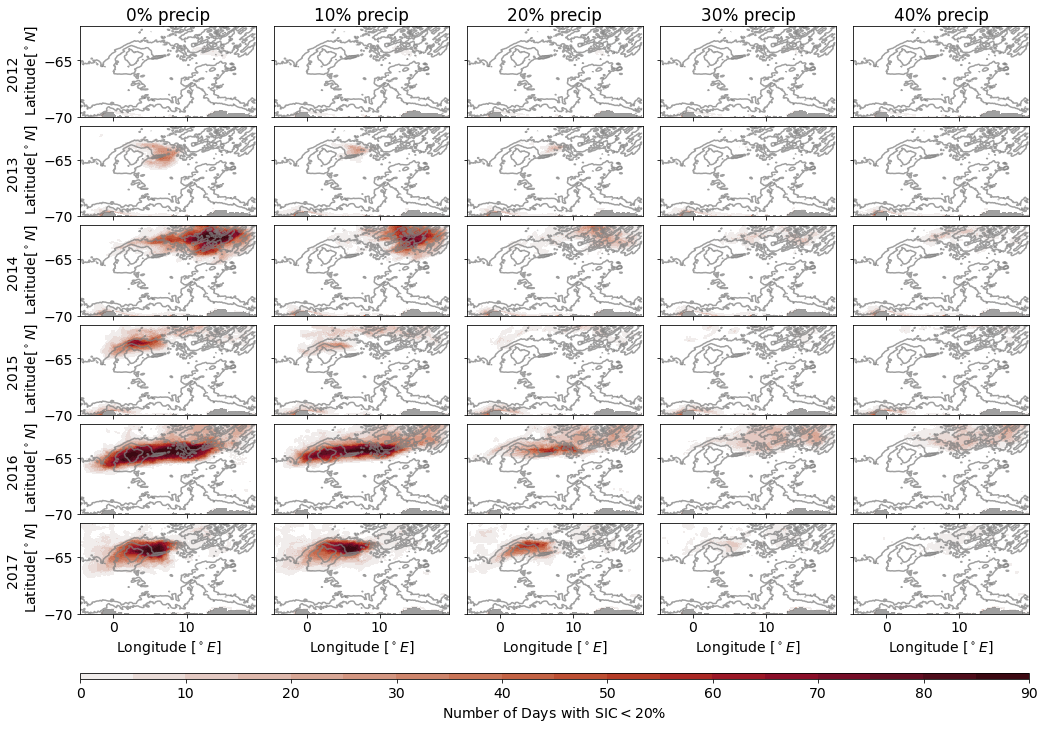

In [19]:
# Figure 3 of the paper
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec
fig = plt.figure(figsize=(17,12))
gs = GridSpec(2,1, height_ratios=[1,0.01],wspace=.01)#,hspace=.01)#,wspace=0.3)

gs1 = GridSpecFromSubplotSpec(6,5, subplot_spec=gs[0],hspace=0.1,wspace=.1)
gs2 = GridSpecFromSubplotSpec(2, 1, subplot_spec=gs[1],hspace=0)

j=0
vmin=0
vmax=90
lev=19
tcmap=cmo.amp
var='sic_02'
for y in range(0,6):
    ax=fig.add_subplot(gs1[j,0])
    cb=ds36[var].where(ds36[var]>0).isel(year=y).plot.pcolormesh(ax=ax,x="lon",y="lat",vmin=vmin,vmax=vmax,levels=lev,cmap=tcmap,add_colorbar=False)
    bat.bathy_meter.where(bat.bathy_meter<10).plot.contourf(x="lon",y="lat",colors='grey',add_colorbar=False,ax=ax,alpha=0.75)
    bat.bathy_meter.plot.contour(x="lon",y="lat",levels=[2500,3500,5000],colors='grey',ax=ax,alpha=0.75)
    ax.set_ylabel('%d \n Latitude[$^\circ N$]'%ds36.year.isel(year=y))
    if j<5:
        ax.set_xticklabels('')
        ax.set_xlabel('')
    else:
        ax.set_xlabel('Longitude [$^\circ E$]')
    ax.set_title('')
    ax.set_xlim(-4.5,19.5)
    ax.set_ylim(-70,-62)
    if j==0:
        ax.set_title('0% precip')
        
    ax=fig.add_subplot(gs1[j,1])
    cb=ds38[var].where(ds38[var]>0).isel(year=y).plot.pcolormesh(ax=ax,x="lon",y="lat",vmin=vmin,vmax=vmax,levels=lev,cmap=tcmap,add_colorbar=False)
    bat.bathy_meter.where(bat.bathy_meter<10).plot.contourf(x="lon",y="lat",colors='grey',add_colorbar=False,ax=ax,alpha=0.75)
    bat.bathy_meter.plot.contour(x="lon",y="lat",levels=[2500,3500,5000],colors='grey',ax=ax,alpha=0.75)
    if j<5:
        ax.set_xticklabels('')
        ax.set_xlabel('')
    else:
        ax.set_xlabel('Longitude [$^\circ E$]')
    ax.set_title('')
    ax.set_yticklabels('')
    ax.set_ylabel('')
    ax.set_xlim(-4.5,19.5)
    ax.set_ylim(-70,-62)
    if j==0:
        ax.set_title('10% precip')
        
    ax=fig.add_subplot(gs1[j,2])
    cb=ds39[var].where(ds39[var]>0).isel(year=y).plot.pcolormesh(ax=ax,x="lon",y="lat",vmin=vmin,vmax=vmax,levels=lev,cmap=tcmap,add_colorbar=False)
    bat.bathy_meter.where(bat.bathy_meter<10).plot.contourf(x="lon",y="lat",colors='grey',add_colorbar=False,ax=ax,alpha=0.75)
    bat.bathy_meter.plot.contour(x="lon",y="lat",levels=[2500,3500,5000],colors='grey',ax=ax,alpha=0.75)
    ax.set_title('')
    if j<5:
        ax.set_xticklabels('')
        ax.set_xlabel('')
    else:
        ax.set_xlabel('Longitude [$^\circ E$]')
    ax.set_yticklabels('')
    ax.set_ylabel('')
    ax.set_xlim(-4.5,19.5)
    ax.set_ylim(-70,-62)
    if j==0:
        ax.set_title('20% precip')

    ax=fig.add_subplot(gs1[j,3])   
    cb=ds40[var].where(ds40[var]>0).isel(year=y).plot.pcolormesh(ax=ax,x="lon",y="lat",vmin=vmin,vmax=vmax,levels=lev,cmap=tcmap,add_colorbar=False)
    bat.bathy_meter.where(bat.bathy_meter<10).plot.contourf(x="lon",y="lat",colors='grey',add_colorbar=False,ax=ax,alpha=0.75)
    bat.bathy_meter.plot.contour(x="lon",y="lat",levels=[2500,3500,5000],colors='grey',ax=ax,alpha=0.75)
    ax.set_title('')
    if j<5:
        ax.set_xticklabels('')
        ax.set_xlabel('')
    else:
        ax.set_xlabel('Longitude [$^\circ E$]')
    ax.set_yticklabels('')
    ax.set_ylabel('')
    ax.set_xlim(-4.5,19.5)
    ax.set_ylim(-70,-62)
    if j==0:
        ax.set_title('30% precip')
    ax=fig.add_subplot(gs1[j,4])     
    cb=ds43[var].where(ds43[var]>0).isel(year=y).plot.pcolormesh(ax=ax,x="lon",y="lat",vmin=vmin,vmax=vmax,levels=lev,cmap=tcmap,add_colorbar=False)
    bat.bathy_meter.where(bat.bathy_meter<10).plot.contourf(x="lon",y="lat",colors='grey',add_colorbar=False,ax=ax,alpha=0.75)
    bat.bathy_meter.plot.contour(x="lon",y="lat",levels=[2500,3500,5000],colors='grey',ax=ax,alpha=0.75)
    ax.set_title('')
    ax.set_xlim(-4.5,19.5)
    ax.set_ylim(-70,-62)
    if j<5:
        ax.set_xticklabels('')
        ax.set_xlabel('')
    else:
        ax.set_xlabel('Longitude [$^\circ E$]')
    ax.set_yticklabels('')
    ax.set_ylabel('')
    if j==0:
        ax.set_title('40% precip')
 
    j=j+1
    
c_ax=fig.add_subplot(gs2[:,0])
plt.colorbar(cb,cax=c_ax,orientation='horizontal',label='Number of Days with SIC$<20\%$')
#plt.tight_layout()
plt.savefig('./2012runs_withEDMF_%s_2007_2017.jpg'%var,dpi=300)

<ipython-input-18-f208c8e453cd>:66: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


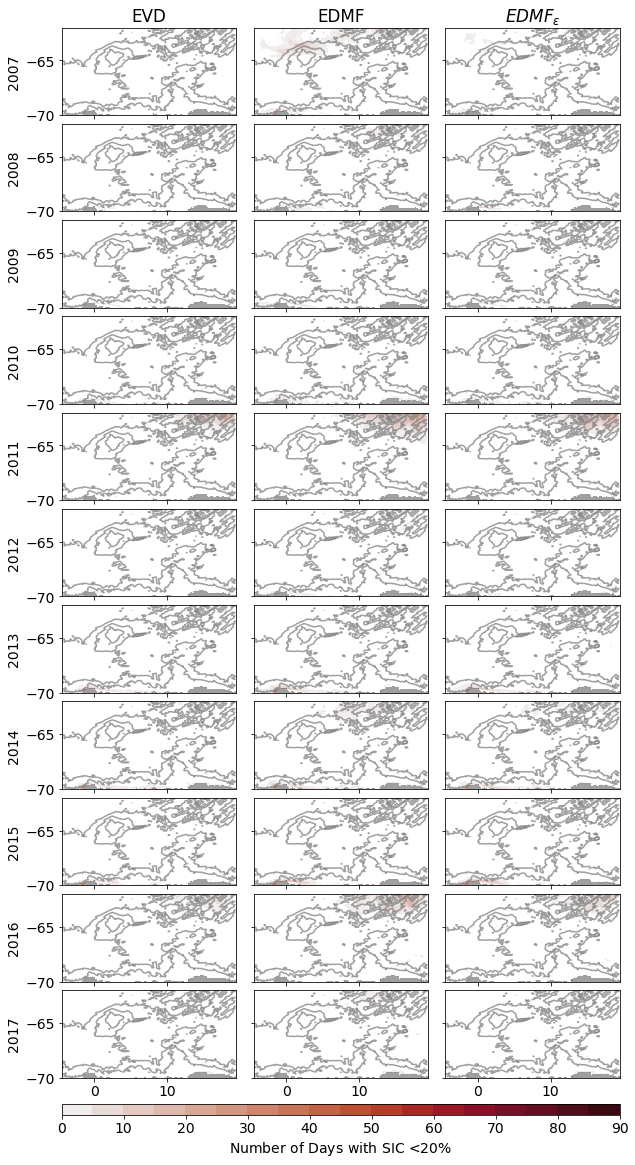

In [18]:
# Supporting Information S2
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec
fig = plt.figure(figsize=(10,20))
gs = GridSpec(2,1, height_ratios=[1,0.01],wspace=.01,hspace=.05)#,wspace=0.3)

gs1 = GridSpecFromSubplotSpec(11,3, subplot_spec=gs[0],hspace=0.1,wspace=.1)
gs2 = GridSpecFromSubplotSpec(2, 1, subplot_spec=gs[1],hspace=0) 

j=0
vmin=0
vmax=90
tcmap=cmo.amp
lev=19
#var='siv_03'
var='sic_02'
for y in range(0,11):       
    ax=fig.add_subplot(gs1[j,0])
    cb=ds01[var].where(ds01[var]>0).isel(year=y).plot.pcolormesh(ax=ax,x="lon",y="lat",vmin=vmin,vmax=vmax,levels=lev,cmap=tcmap,add_colorbar=False)
    bat.bathy_meter.where(bat.bathy_meter<10).plot.contourf(x="lon",y="lat",colors='grey',add_colorbar=False,ax=ax,alpha=0.75)
    bat.bathy_meter.plot.contour(x="lon",y="lat",levels=[2500,3500,5000],colors='grey',ax=ax,alpha=0.75)
    if y<10:
        ax.set_xticklabels('')
    ax.set_xlabel('')
    ax.set_title('')
    #ax.set_yticklabels('')
    ax.set_xlim(-4.5,19.5)
    ax.set_ylim(-70,-62)
    ax.set_ylabel('%d'%ds01.year.isel(year=y))
    if j==0:
        ax.set_title('EVD')
        
    ax=fig.add_subplot(gs1[j,1])
    cb=ds03[var].where(ds03[var]>0).isel(year=y).plot.pcolormesh(ax=ax,x="lon",y="lat",vmin=vmin,vmax=vmax,levels=lev,cmap=tcmap,add_colorbar=False)
    bat.bathy_meter.where(bat.bathy_meter<10).plot.contourf(x="lon",y="lat",colors='grey',add_colorbar=False,ax=ax,alpha=0.75)
    bat.bathy_meter.plot.contour(x="lon",y="lat",levels=[2500,3500,5000],colors='grey',ax=ax,alpha=0.75)
    if y<10:
        ax.set_xticklabels('')
    ax.set_xlim(-4.5,19.5)
    ax.set_ylim(-70,-62)
    ax.set_title('')
    ax.set_xlabel('')
    ax.set_yticklabels('')
    ax.set_ylabel('')
    if j==0:
        ax.set_title('EDMF')
    ax=fig.add_subplot(gs1[j,2])
    cb=ds04[var].where(ds04[var]>0).isel(year=y).plot.pcolormesh(ax=ax,x="lon",y="lat",vmin=vmin,vmax=vmax,levels=lev,cmap=tcmap,add_colorbar=False)
    bat.bathy_meter.where(bat.bathy_meter<10).plot.contourf(x="lon",y="lat",colors='grey',add_colorbar=False,ax=ax,alpha=0.75)
    bat.bathy_meter.plot.contour(x="lon",y="lat",levels=[2500,3500,5000],colors='grey',ax=ax,alpha=0.75)
    if y<10:
        ax.set_xticklabels('')
    ax.set_xlabel('')
    ax.set_xlim(-4.5,19.5)
    ax.set_ylim(-70,-62)
    ax.set_yticklabels('')
    ax.set_ylabel('')
    ax.set_title('')
    if j==0:
        ax.set_title('$EDMF_{\\epsilon}$')
   
        
    j=j+1
    
c_ax=fig.add_subplot(gs2[:,0])
plt.colorbar(cb,cax=c_ax,orientation='horizontal',label='Number of Days with SIC <20$\%$')
plt.tight_layout()
plt.savefig(f'./exp_01_03_04_{var}_2007_2017.jpg',dpi=300)